In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sys

In [2]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
import import_ipynb
import AdjacencyList as adja

importing Jupyter notebook from AdjacencyList.ipynb


In [4]:
adj = adja.generateAdjacencyList()
matrix = """
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
"""
mat = [[int(c) for c in line] for line in matrix.strip().split('\n')]

In [5]:
import import_ipynb
import player as p

importing Jupyter notebook from player.ipynb
importing Jupyter notebook from convert.ipynb
importing Jupyter notebook from nodeDelete.ipynb
importing Jupyter notebook from backtracking.ipynb


In [6]:
import import_ipynb
import wall as w

importing Jupyter notebook from wall.ipynb


In [7]:
import import_ipynb
import dfs as dfspath
import bfs as bfspath
import bfs2 as bfspath2
import backtracking as backtrackingpath

importing Jupyter notebook from dfs.ipynb
importing Jupyter notebook from bfs.ipynb
importing Jupyter notebook from bfs2.ipynb


In [8]:
import import_ipynb
import nodeDelete as nd

In [9]:
leaderboard = []
paths = []

In [10]:
def showPositions(leaderboard):
    print("The positions are:")
    for i in range(len(leaderboard)):
        print("Place", i+1, "-> Player", leaderboard[i]+1)

def setLeaderboard(paths):
    lenghts = []
    positions = []
    leaderboard = []
    for i in range(len(paths)):
        lenghts.append(len(paths[i]))
    for i in range(len(paths)):
        positions.append(i)
    positions = [x for y, x in sorted(zip(lenghts, positions))]
    lenghts.sort()
    leaderboard = positions
    #showPositions(leaderboard)
    return leaderboard

def showPaths(paths):
    names = ['Blue', 'Green', 'Yellow', 'Pink']
    for i in range(len(paths)):
        print(names[i], "player has a path of:", paths[i])

def updatePaths(paths, players, adj):
    for i in range(len(players)):
        paths[i] = bfspath2.findPathBFS(adj, p.players[i])
    return paths


In [11]:
class Game:
    def __init__(self, nop):
        self.nop = nop
        
    def startGame(self):
        Game.addPlayers(self.nop)
        w.addWalls(self.nop)
        self.initPaths()
        self.game()

    def drawQuoridorBoard(self):
        bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
        #total of 17x17 board
        bo += 0.8 #opactiy of black spaces
        bo[ ::2, ::2] = 1
        bo[0::2, 0::2] = 1
        
        fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
        ax.imshow(bo, interpolation='nearest')

        Game.drawPlayers(ax)

        w.drawWalls(ax)

        ax.set(xticks=[], yticks=[])
        ax.axis('image')

        plt.show()
        
    def game(self):
        self.drawQuoridorBoard()
        #checks if a player reached the opposite side
        gameover = self.checkWinner()

        return gameover

    def checkWinner(self):
        finish_line = [16,0,16,0]
        for pl in p.players:
            i = pl.id - 1
            if (pl.id <= 2):
                if(pl.x == finish_line[i]):
                    print("GAME OVER")
                    print(pl.name, "player wins")
                    return True
            else:
                if(pl.y == finish_line[i]):
                    print("GAME OVER")
                    print(pl.name, "player wins")
                    return True
        return False

    def addPlayers(nop):
        initState = [[0, 8, 'royalblue', 'Blue'], [16,8,'limegreen', 'Green'], 
                 [8, 0, 'gold', 'Yellow'],     [8, 16, 'deeppink', 'Pink']]
        
        for i in range(nop):
            pl = p.Player(initState[i][0], initState[i][1], initState[i][2], i+1, initState[i][3])
            p.players.append(pl)

    def drawPlayers(ax):
        for pl in p.players:
            ax.text(pl.x, pl.y, u'\u265F', size=30, 
            ha='center', va='center', color=pl.color)
    
    def initPaths(self):
        for i in range(self.nop):
            paths.append([])


In [12]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 20 number of players (2 or 4)

In [13]:
#TEST CASE 1:
#Greedy vs Greedy
test1 = False

if test1:
    winner = False
    nop = 2
    g = Game(nop)
    g.startGame()

    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            adj, mat = p.players[i].think_greedy(paths, leaderboard, p.players, i, adj, mat)
            if(g.game() == True):
                winner = True
                break

In [14]:
#TEST CASE 2:
#Uncertainty principle vs Uncertainty principle
test2 = False

if test2:
    winner = False
    nop = 2
    g = Game(nop)
    g.startGame()

    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            adj, mat = p.players[i].uncertainty_principle(paths, leaderboard, p.players, i, adj, mat)
            if(g.game() == True):
                winner = True
                break

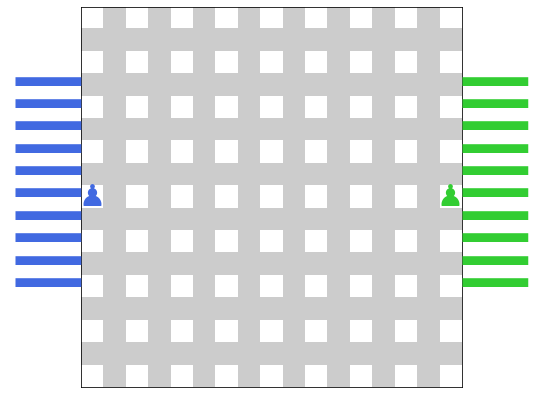

Blue player placed a wall
Blue Player has: 9 walls left
Poner pared


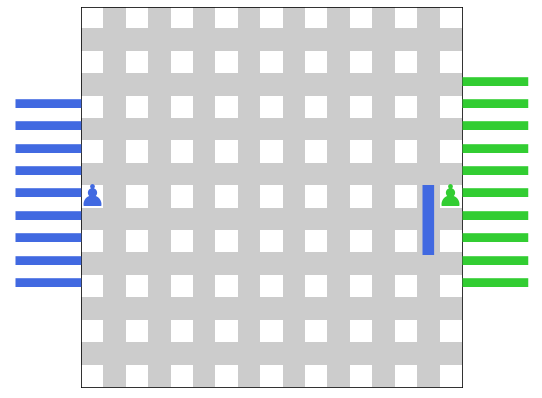

Green player placed a wall
Green Player has: 9 walls left


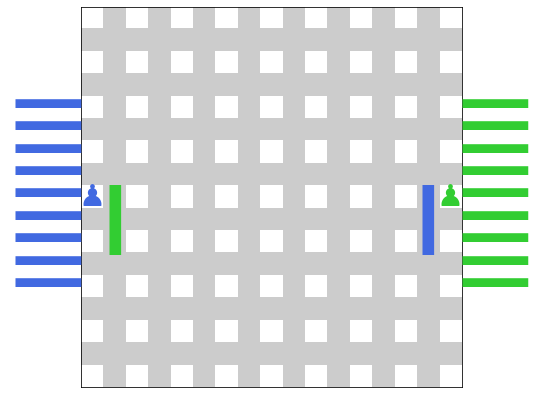

Blue player moved to node: 27
Avanzar


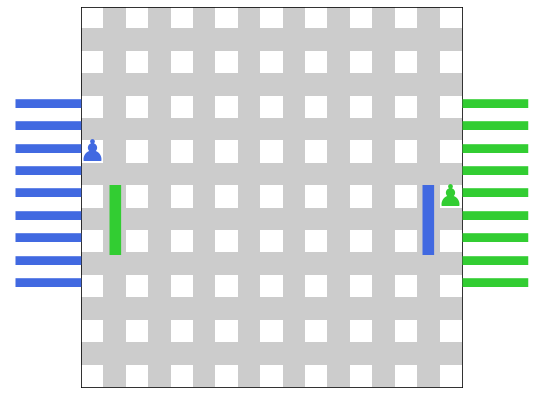

Green player placed a wall
Green Player has: 8 walls left


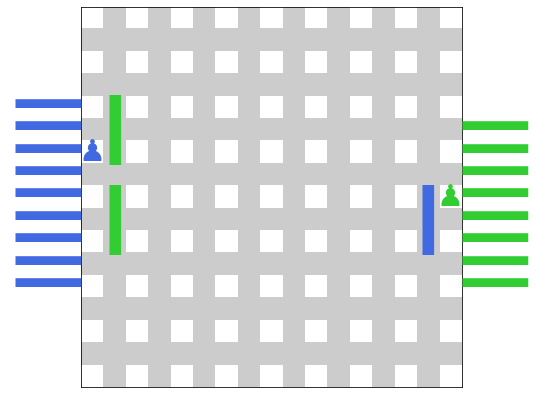

Blue player moved to node: 18
Avanzar


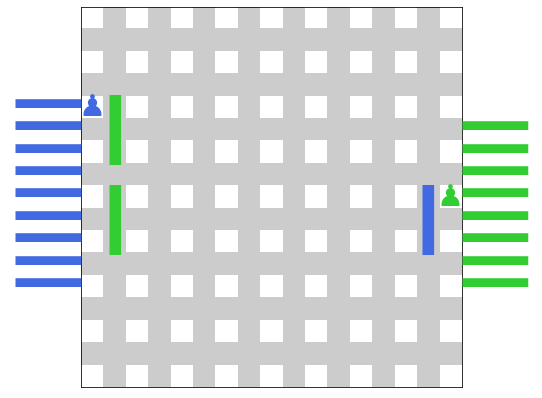

Green player moved to node: 53


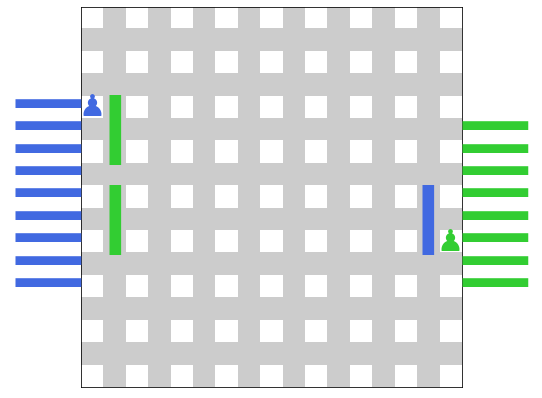

Blue player moved to node: 9
Avanzar


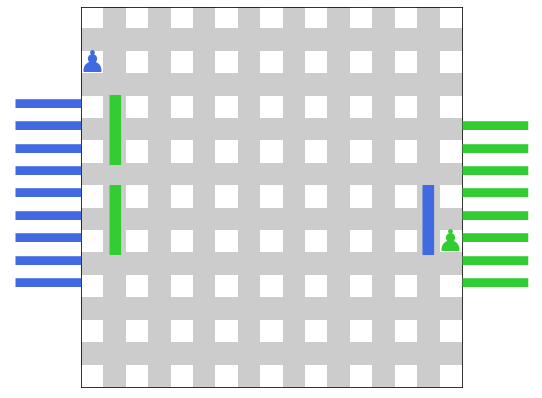

Green player placed a wall
Green Player has: 7 walls left


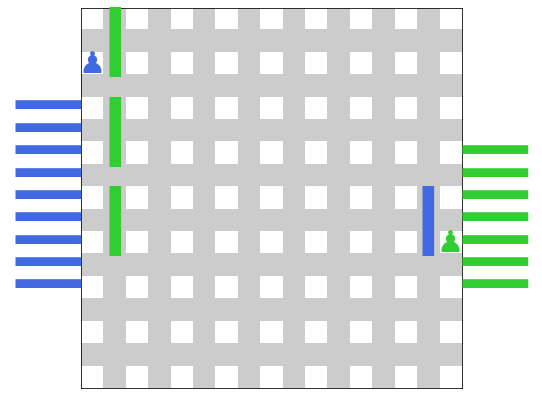

Blue player moved to node: 18
Avanzar


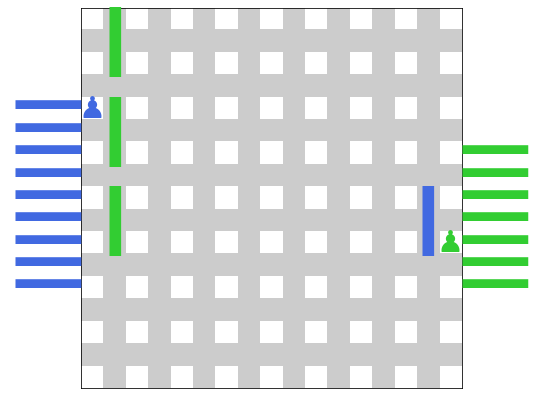

Green player moved to node: 62


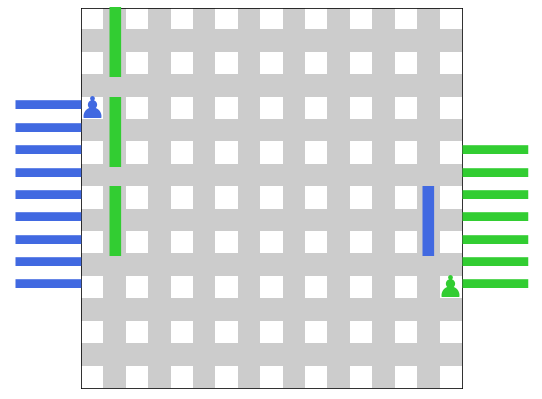

Blue player placed a wall
Blue Player has: 8 walls left
Poner pared


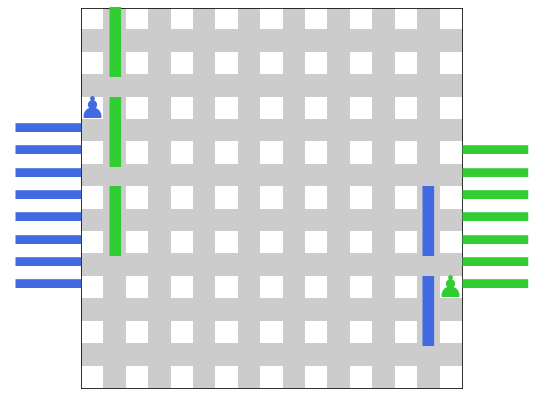

Green player moved to node: 71


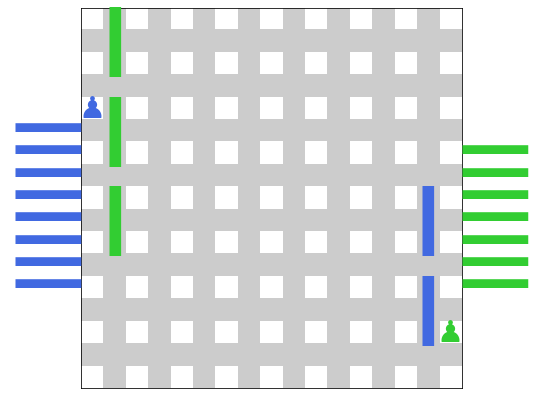

Blue player moved to node: 27
Avanzar


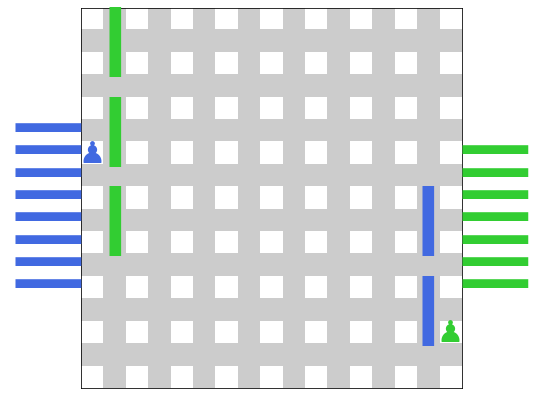

Green player moved to node: 80


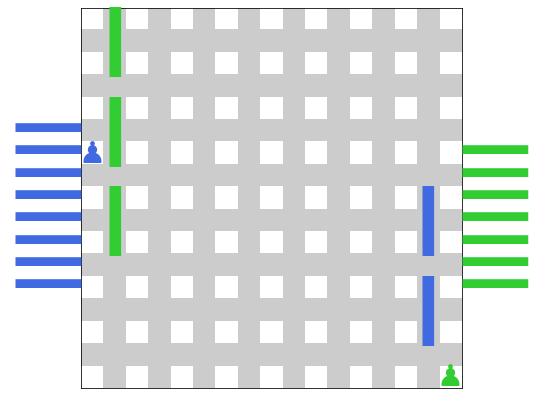

Blue player moved to node: 36
Avanzar


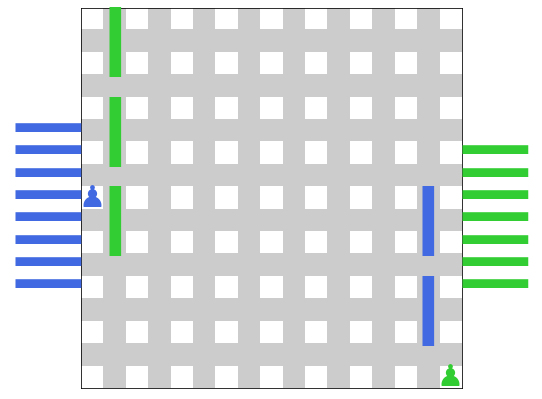

Green player moved to node: 79


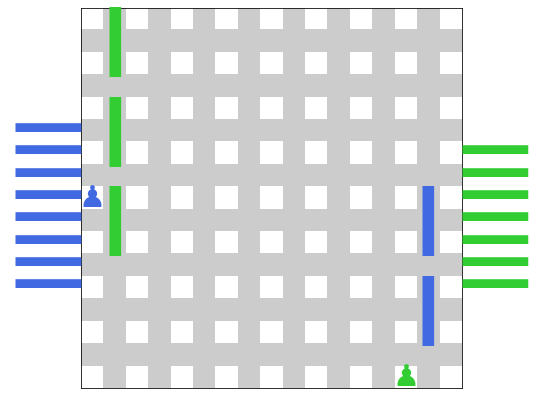

Blue player moved to node: 45
Avanzar


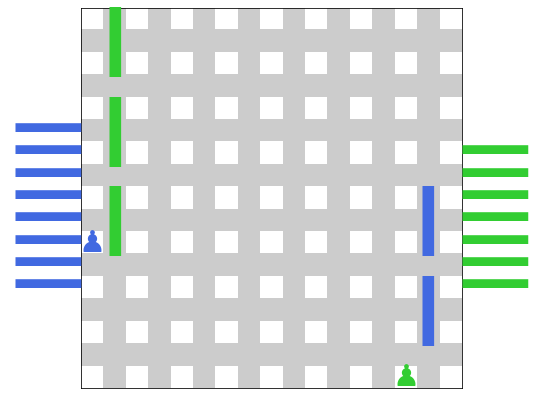

Green player moved to node: 78


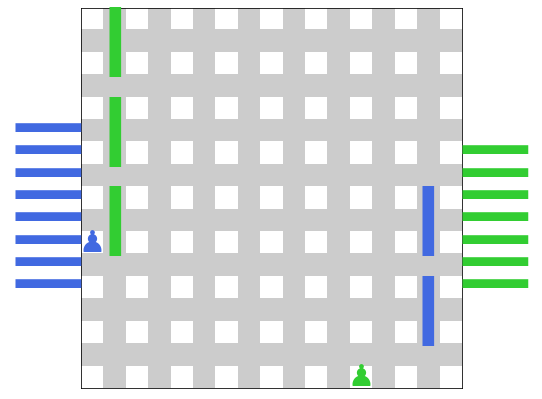

Blue player moved to node: 54
Avanzar


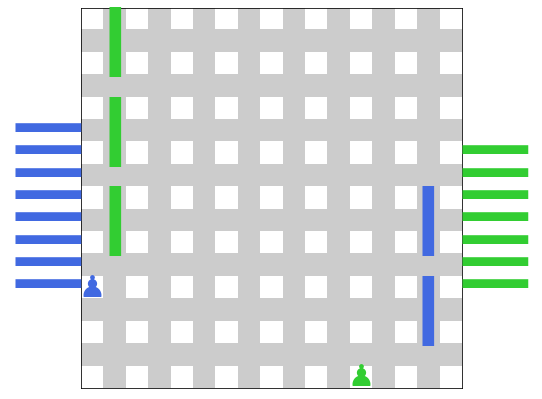

Green player moved to node: 77


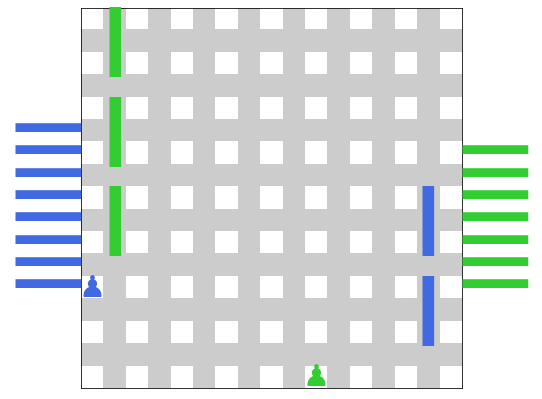

Blue player moved to node: 55
Avanzar


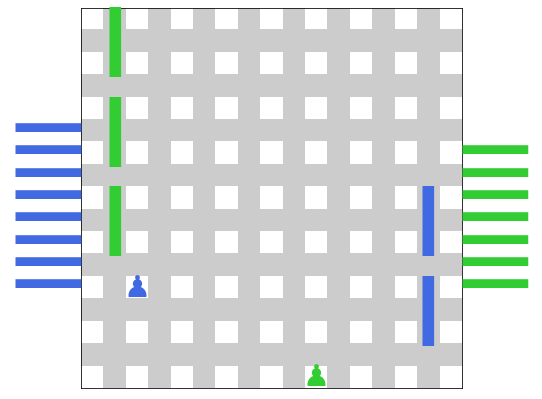

Green player moved to node: 76


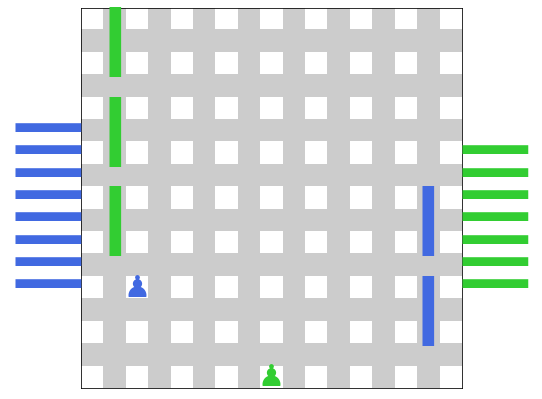

Blue player placed a wall
Blue Player has: 7 walls left
Poner pared


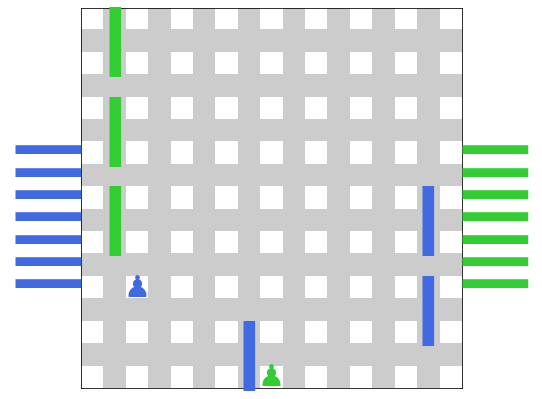

Green player moved to node: 67


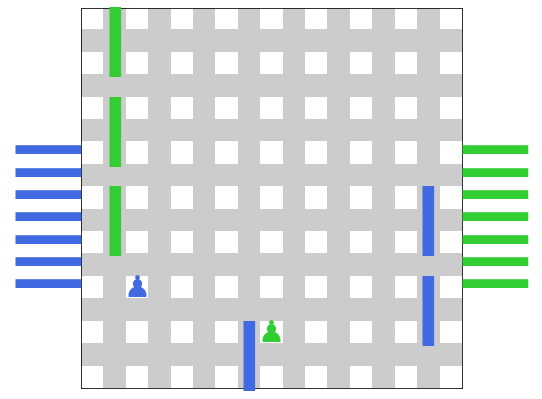

Blue player moved to node: 56
Avanzar


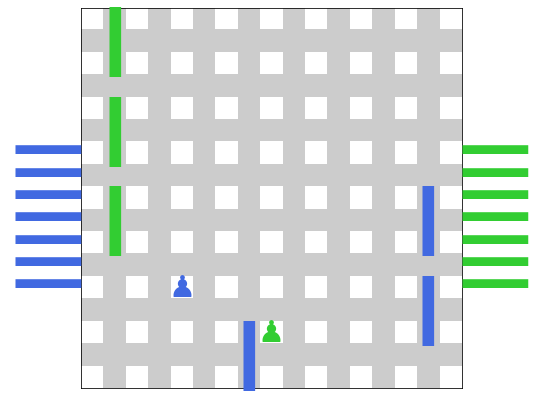

Green player moved to node: 58


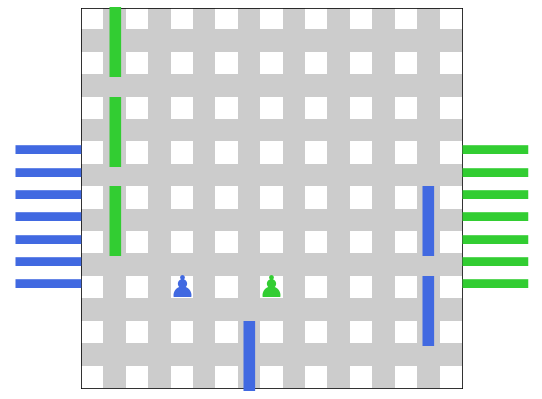

Blue player placed a wall
Blue Player has: 6 walls left
Poner pared


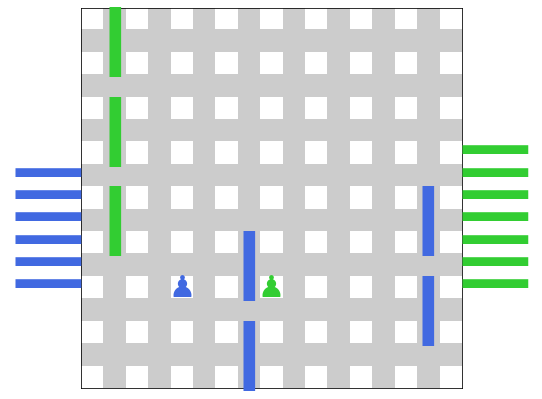

Green player moved to node: 49


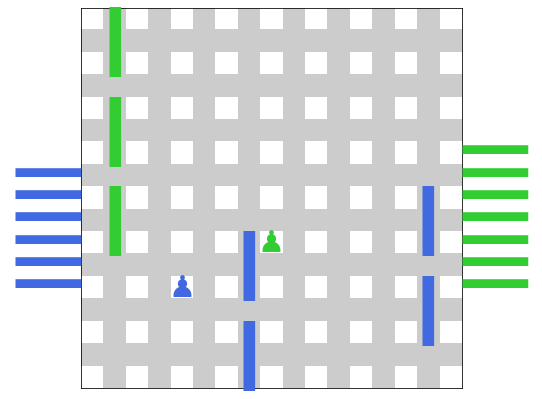

Blue player moved to node: 47
Avanzar


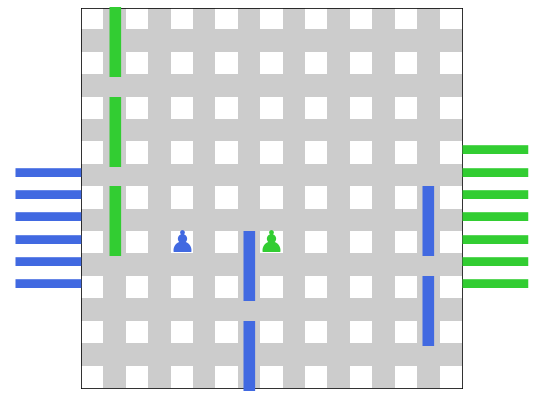

Green player moved to node: 40


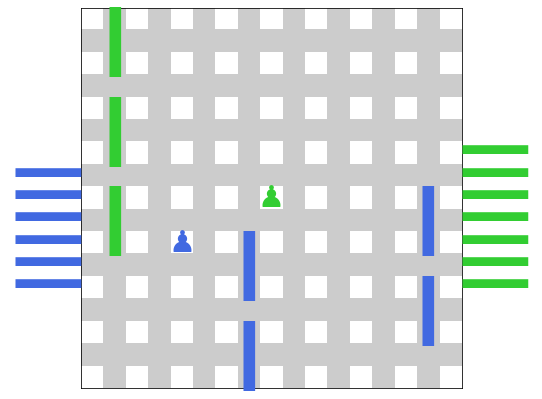

Blue player placed a wall
Blue Player has: 5 walls left
Poner pared


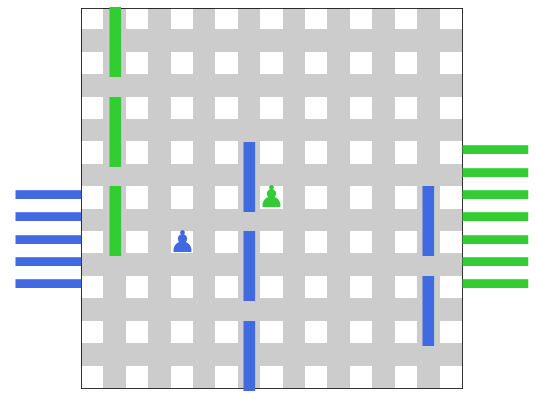

Green player placed a wall
Green Player has: 6 walls left


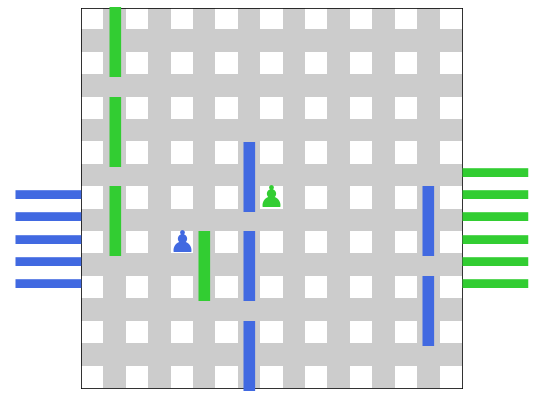

Blue player moved to node: 38
Avanzar


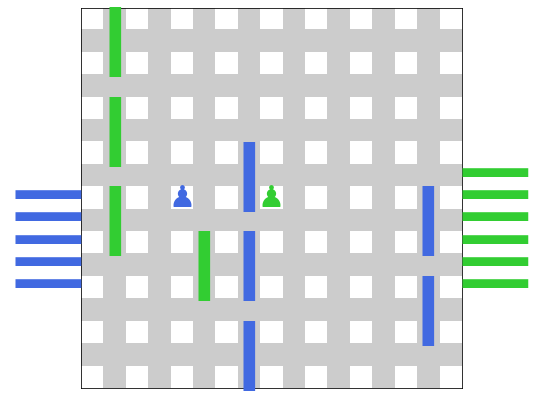

Green player placed a wall
Green Player has: 5 walls left


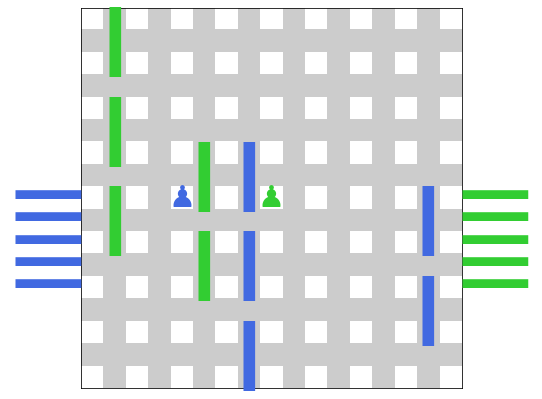

Blue player moved to node: 29
Avanzar


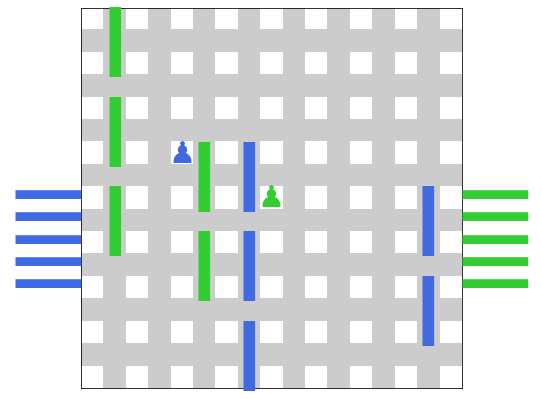

Green player moved to node: 31


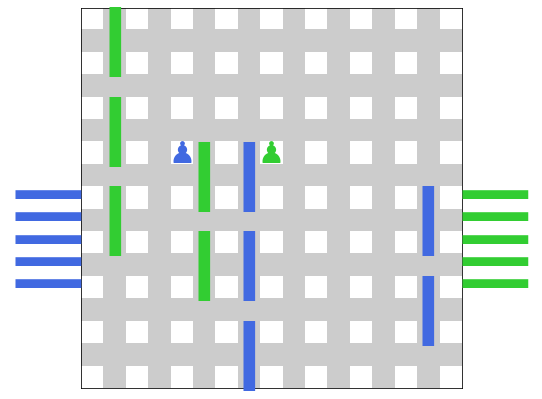

Blue player moved to node: 20
Avanzar


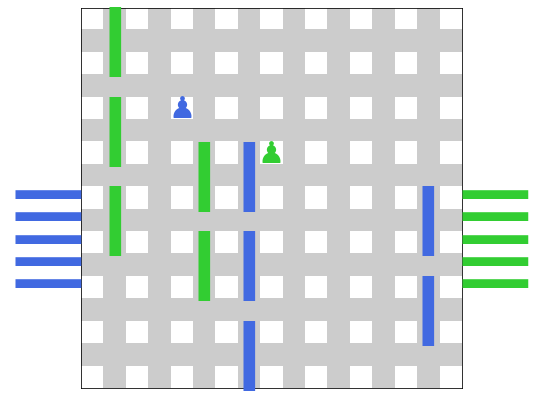

Green player placed a wall
Green Player has: 4 walls left


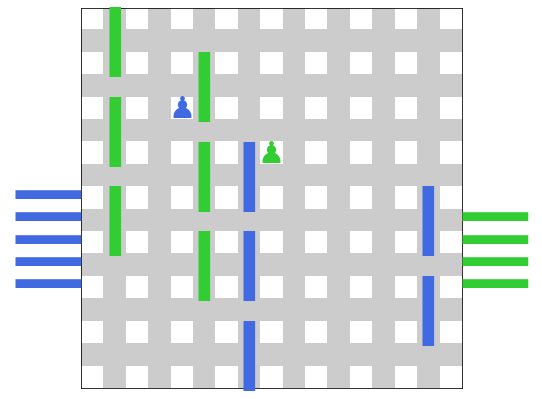

Blue player moved to node: 11
Avanzar


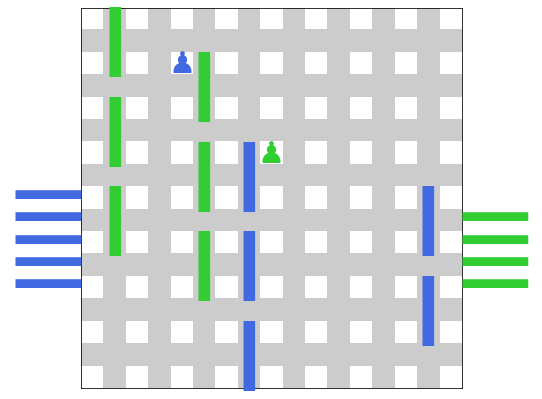

Green player moved to node: 22


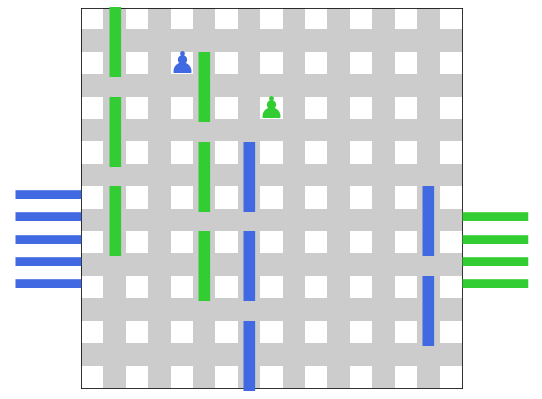

Blue player moved to node: 2
Avanzar


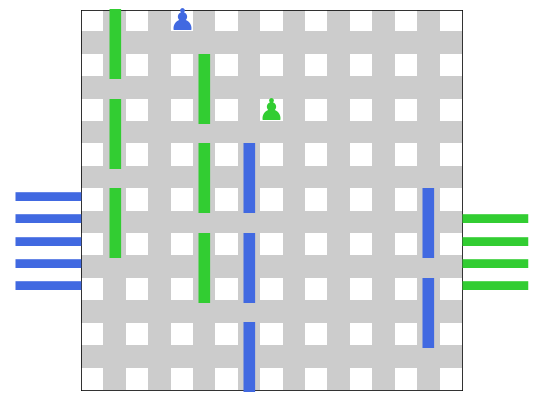

Green player moved to node: 21


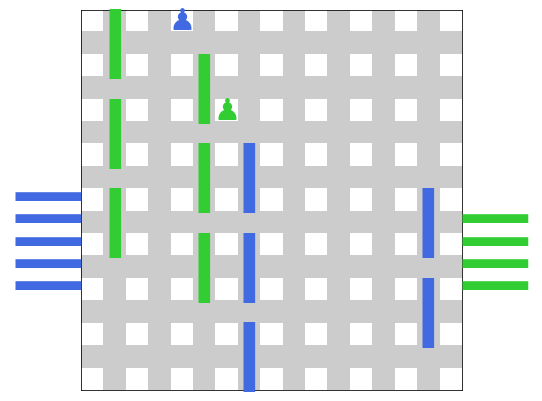

Blue player moved to node: 3
Avanzar


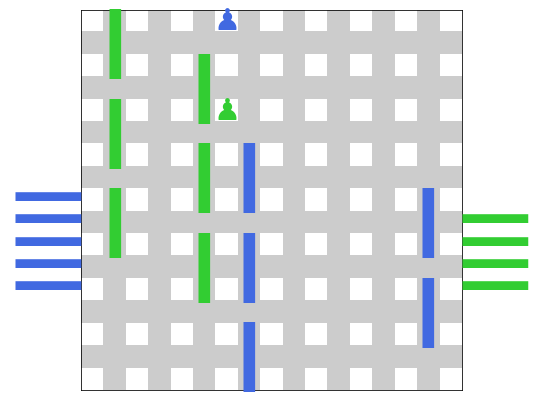

Green player placed a wall
Green Player has: 3 walls left


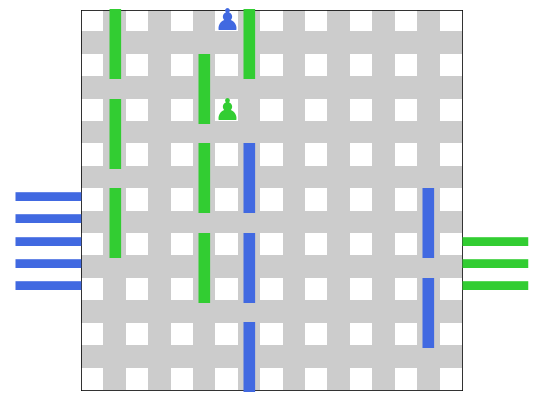

Blue player moved to node: 12
Avanzar


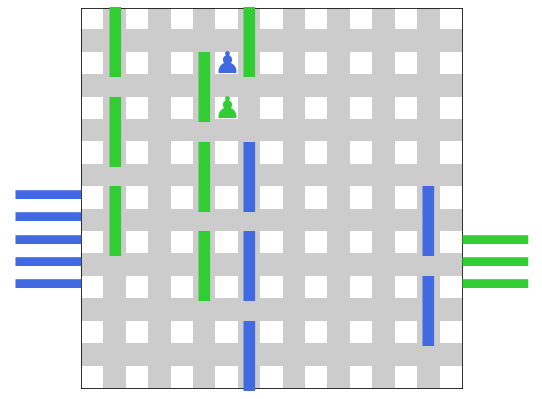

Green player moved to node: 30


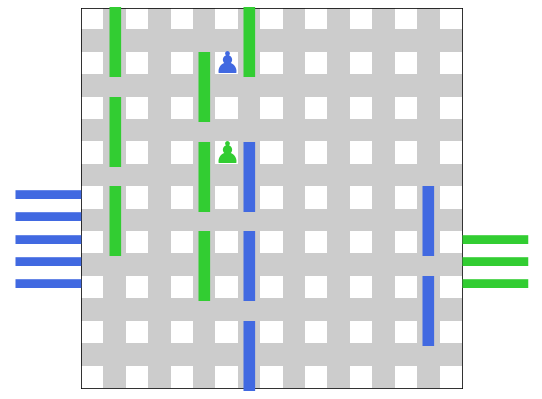

Blue player moved to node: 21
Avanzar


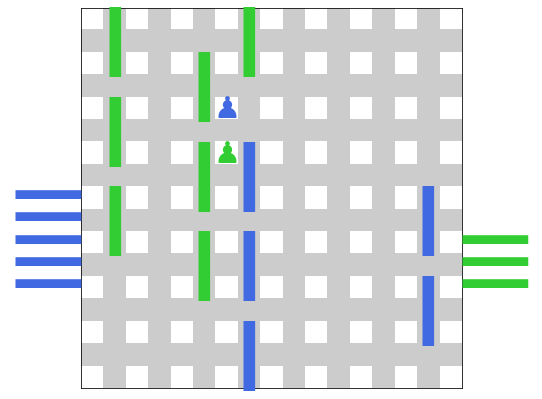

Green player moved to node: 39


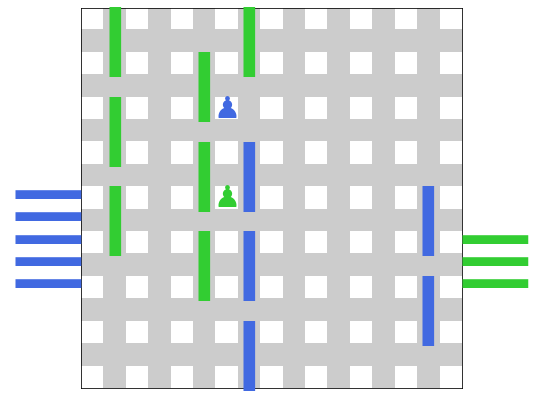

Blue player moved to node: 22
Avanzar


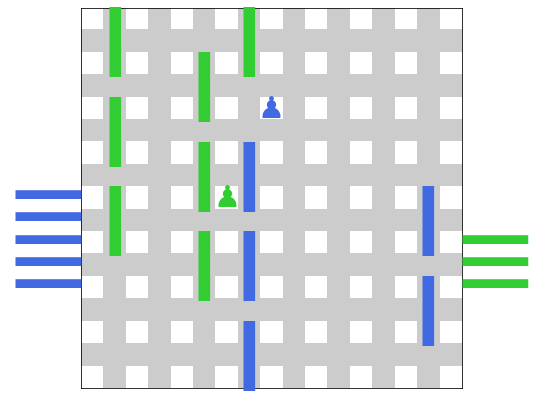

Green player placed a wall
Green Player has: 2 walls left


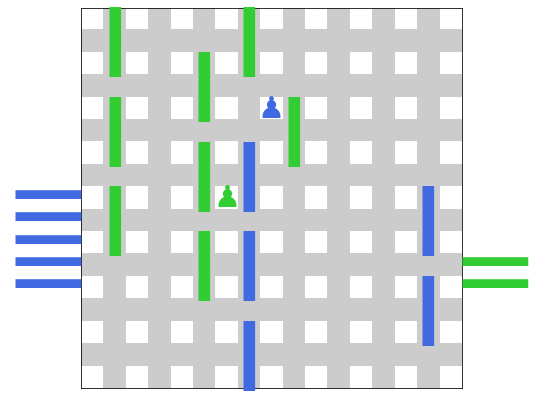

Blue player moved to node: 13
Avanzar


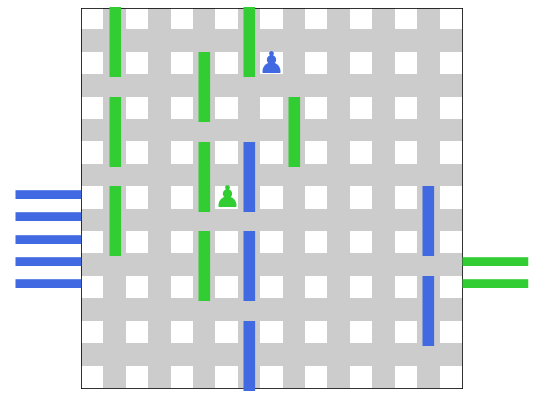

Green player placed a wall
Green Player has: 1 walls left


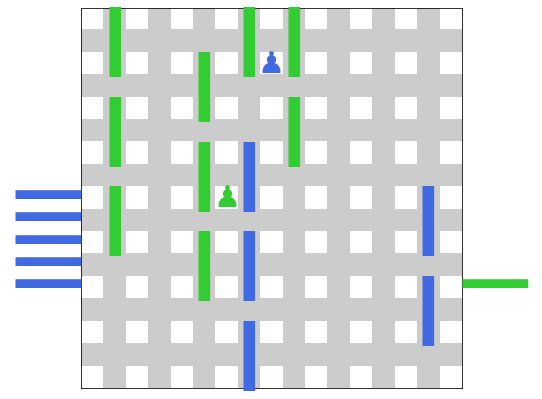

Blue player moved to node: 22
Avanzar


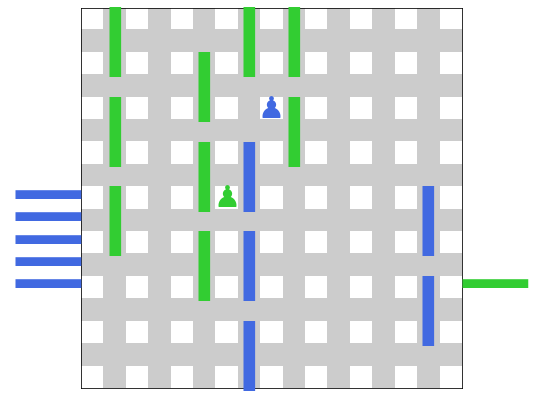

Green player moved to node: 48


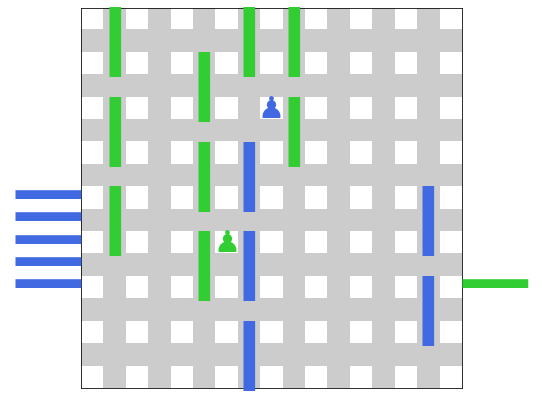

Blue player moved to node: 31
Avanzar


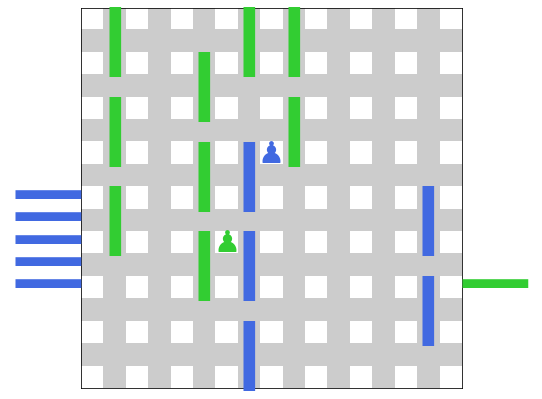

Green player moved to node: 57


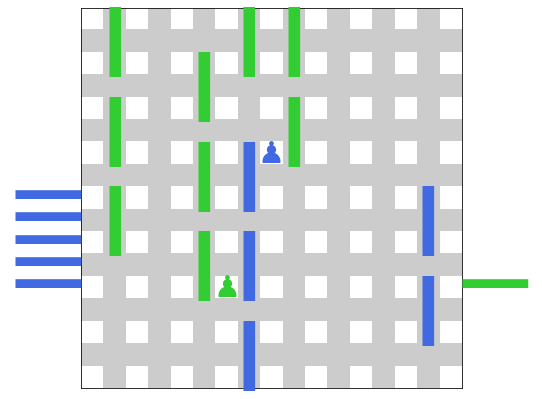

Blue player moved to node: 40
Avanzar


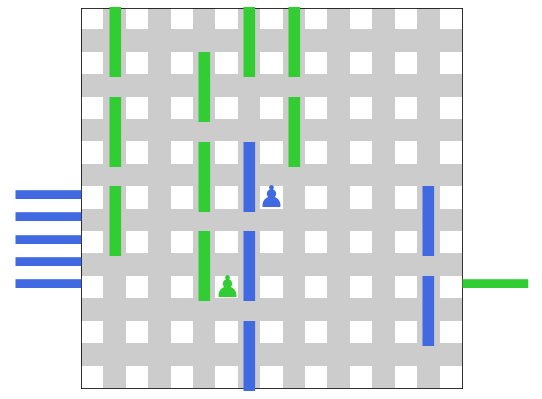

Green player moved to node: 66


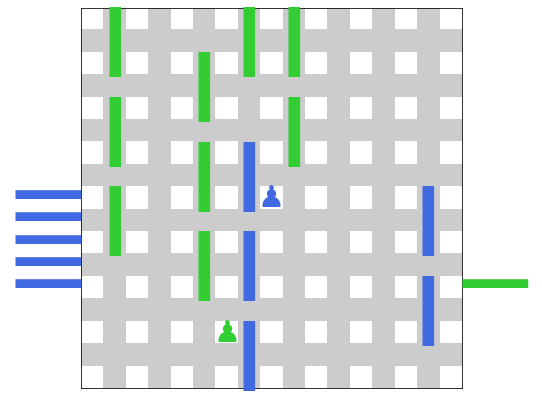

Blue player moved to node: 41
Avanzar


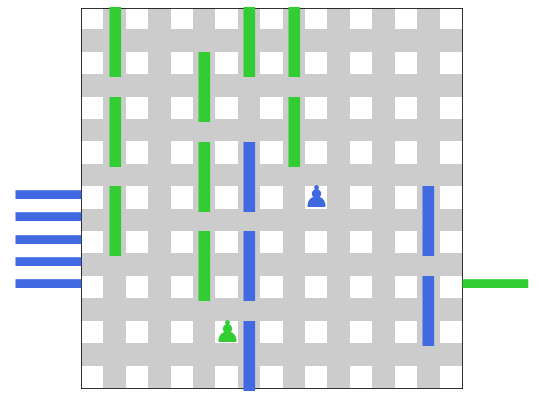

Green player moved to node: 65


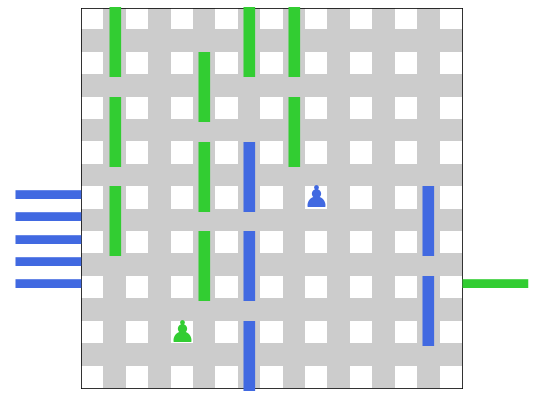

Blue player placed a wall
Blue Player has: 4 walls left
Poner pared


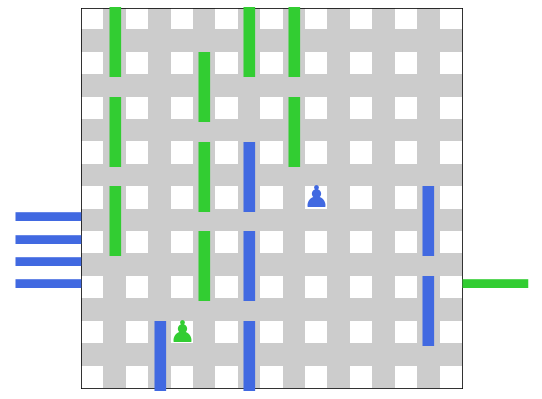

Green player moved to node: 56


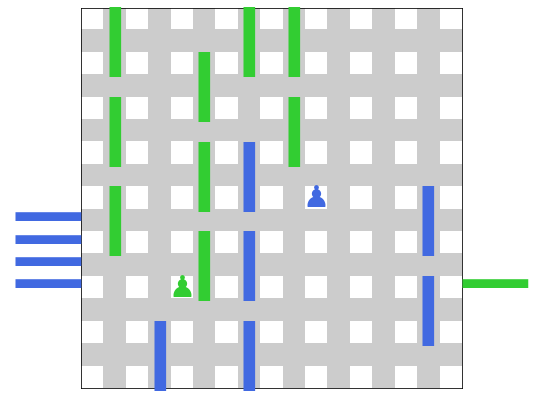

Blue player moved to node: 32
Avanzar


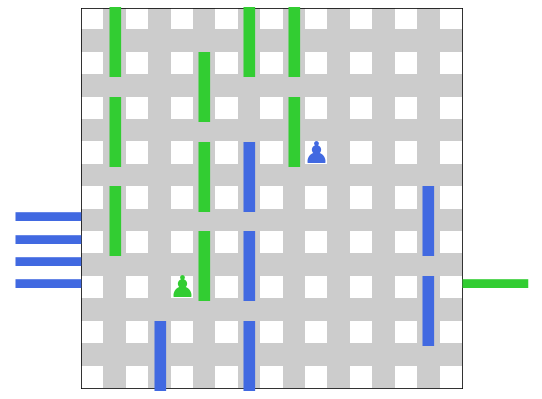

Green player moved to node: 55


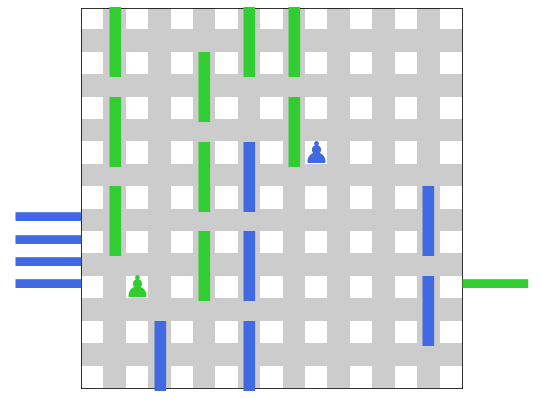

Blue player moved to node: 33
Avanzar


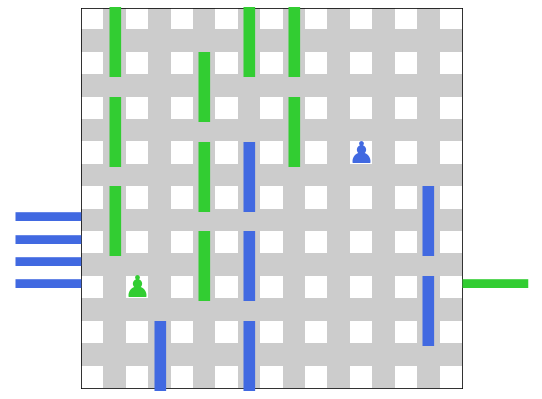

Green player moved to node: 54


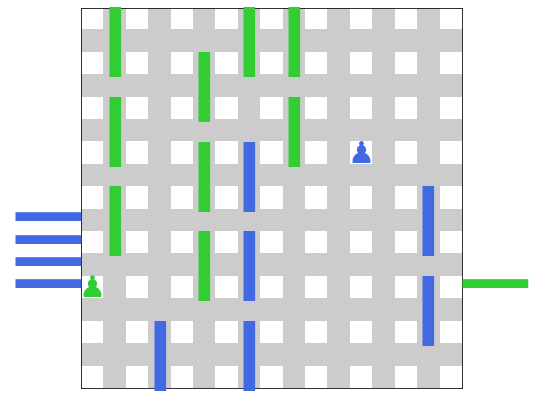

GAME OVER
Green player wins


In [15]:
#TEST CASE 3:
#Uncertainty principle vs Greedy
test3 = True

if test3:
    winner = False
    nop = 2
    g = Game(nop)
    g.startGame()

    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            if i == 0:
                adj, mat = p.players[i].uncertainty_principle(paths, leaderboard, p.players, i, adj, mat)
            else:
                adj, mat = p.players[i].think_greedy(paths, leaderboard, p.players, i, adj, mat)
            if(g.game() == True):
                winner = True
                break

In [16]:
#TEST CASE 4:
#Bot de DFS vs Bot de BFS2 SIN PAREDES
test4 = False

if test4:
    nop = 2
    g = Game(nop)
    g.drawQuoridorBoard()
    path1 = dfspath.findPathDFS(adj, p.players[0]) #camino generado con DFS
    path2 = bfspath2.findPathBFS(adj, p.players[1]) #camino generado con BFS
    print("El bot DFS", p.players[0].id, "tomará el camino:", path1)
    print("El bot BFS", p.players[1].id, "tomará el camino:", path2)

    i = 0
    
    while g.checkWinner() != True:
        if i == 6:
            adj, mat = p.players[0].place_wall(3, 9, adj, mat, 'v')
            path1 = dfspath.findPathDFS(adj, p.players[0])
            path2 = bfspath2.findPathBFS(adj, p.players[1])
            print("Camino recalculado de DFS ", path1)
            print("Camino recalculado de BFS ", path2)
        p.players[0].move_from_path(path1)
        g.game()
        p.players[1].move_from_path(path2)
        g.game()
        i += 1
        

In [17]:
#TEST CASE 2:
test2 = False
#Bot de DFS vs Bot de backtracking CON PAREDES
#con paredes dinamicas
if test2:
    nop = 2
    g = Game(nop)
    g.drawQuoridorBoard()
    adj, mat = p.players[0].place_wall(15, 7, adj, mat, 'v')
    adj, mat = p.players[1].place_wall(1, 13, adj, mat, 'h')
    path1 = dfspath.findPathDFS(adj, p.players[0]) #camino generado con DFS
    path2 = backtrackingpath.backtracking(mat, p.players[1]) #camino generado por backtracking
    print("El bot DFS", p.players[0].id, "tomará el camino:", path1)
    print("La cantidad de pasos son:", len(path1))
    print("El bot Backtracking", p.players[1].id, "tomará el camino:", path2)
    print("La cantidad de pasos son:", len(path2))
    i = 0
    while g.checkWinner() != True:
        #Cuando un jugador esté a dos movimientos de llegar, el otro jugador
        #pondra una pared para que se tenga que desviar
        #asi recalcularan sus caminos
        if i == 6:
            adj, mat = p.players[0].place_wall(3, 9, adj, mat, 'v')
            path1 = dfspath.findPathDFS(adj, p.players[0])
            path2 = backtrackingpath.backtracking(mat, p.players[1])
            print("Camino recalculado de DFS ", path1)
            print("Camino recalculado de Backtracking ", path2)
        if(g.checkWinner() != True):
            p.players[0].move_from_path(path1)
            g.game()
        if(g.checkWinner() != True):
            p.players[1].move_from_path_bk(path2)
            g.game()
        i+=1

In [18]:
#TEST CASE 3:
#Backtracking vs BFS vs DFS
#EL REAL CROSSOVER > Israel de Delfin Quishpe, La Tigresa y Wendy
#Paredes ya inicializadas
#Paredes dinamicas
test3 = False

if test3:
    nop = 4
    g = Game(nop)
    g.drawQuoridorBoard()
    adj, mat = p.players[0].place_wall(15, 7, adj, mat, 'v')
    adj, mat = p.players[1].place_wall(1, 13, adj, mat, 'h')
    adj, mat = p.players[2].place_wall(9, 15, adj, mat, 'h')
    adj, mat = p.players[3].place_wall(7, 1, adj, mat, 'h')
    path1 = dfspath.findPathDFS(adj, p.players[0]) #camino generado con DFS
    path2 = backtrackingpath.backtracking(mat, p.players[1]) #camino generado por bt
    path3 = dfspath.findPathDFS(adj, p.players[2]) #camino generado con DFS
    path4 = bfspath2.findPathBFS(adj, p.players[3]) #camino generado por bt

    print("El bot DFS", p.players[0].id, "tomará el camino:", path1)
    print("La cantidad de pasos son:", len(path1))
    print("El bot Backtracking", p.players[1].id, "tomará el camino:", path2)
    print("La cantidad de pasos son:", len(path2))
    print("El bot DFS", p.players[2].id, "tomará el camino:", path3)
    print("La cantidad de pasos son:", len(path3))
    print("El bot BFS", p.players[3].id, "tomará el camino:", path4)
    print("La cantidad de pasos son:", len(path4))

    i = 0
    while g.checkWinner() != True:
        #Cuando un jugador esté a dos movimientos de llegar, el otro jugador
        #pondra una pared para que se tenga que desviar
        #asi recalcularan sus caminos
        if i == 6:
            adj, mat = p.players[0].place_wall(3, 9, adj, mat, 'v')
            path1 = dfspath.findPathDFS(adj, p.players[0])
            path2 = backtrackingpath.backtracking(mat, p.players[1])
            path3 = dfspath.findPathDFS(adj, p.players[2])
            path4 = bfspath2.findPathBFS(adj, p.players[3])
            print("Camino recalculado de DFS ", path1)
            print("Camino recalculado de Backtracking ", path2)
            print("Camino recalculado de DFS ", path3)
            print("Camino recalculado de BFS ", path4)
        if(g.checkWinner() != True):
            p.players[0].move_from_path(path1)
            g.game()
        if(g.checkWinner() != True):
            p.players[1].move_from_path_bk(path2)
            g.game()
        if(g.checkWinner() != True):
            p.players[2].move_from_path(path3)
            g.game()
        if(g.checkWinner() != True):
            p.players[3].move_from_path(path4)
            g.game()
        i+=1
